# **Série de Travaux Pratiques N° 4 : Regréssion Multiple et Regréssion Polynomiale**

# **Partie I : Regréssion multiple**

- La régression multiple est comme la régression linéaire, mais avec plus d'une valeur indépendante, ce qui signifie que nous essayons de prédire une valeur basée sur deux variables ou plus.

- L’ensemble de données ci-dessous contient des informations sur les voitures.
- Nous pouvons prédire les émissions de CO2 d’une voiture en fonction de la taille du moteur, mais avec la régression multiple, nous pouvons intégrer davantage de variables, comme le poids de la voiture, pour rendre la prédiction plus précise.

### **Question 1**

1)- Lisez le fichier "data.csv"renvoyez un objet DataFrame et afficher le dataset avec head()

In [2]:
import pandas as pd  # Importation de la bibliothèque pandas pour la manipulation et l'analyse de données

# Lire le fichier CSV "data.csv" et charger les données dans un DataFrame nommé 'data'
data = pd.read_csv("data.csv")

# Afficher les premières lignes du DataFrame 'data' à l'aide de la fonction head()
print(data.head())


          Car       Model  Volume  Weight  CO2
0      Toyoty        Aygo    1000     790   99
1  Mitsubishi  Space Star    1200    1160   95
2       Skoda      Citigo    1000     929   95
3        Fiat         500     900     865   90
4        Mini      Cooper    1500    1140  105


### **Question 2**

2)- Faites ensuite une dataframe des valeurs indépendantes (Volume et Wheight) et appelez cette variable X.

In [3]:
# Sélectionner les colonnes "Volume" et "Weight" du DataFrame 'data' et les assigner à la variable X
X = data.loc[:, ["Volume", "Weight"]]

# Afficher les cinq premières lignes de X à l'aide de la fonction head()
print(X.head())

   Volume  Weight
0    1000     790
1    1200    1160
2    1000     929
3     900     865
4    1500    1140


### **Question 3**

3)- Mettez les valeurs dépendantes (CO2) dans une variable appelée y.






In [4]:
# Sélectionner la colonne "CO2" du DataFrame 'data' et l'assigner à la variable y
y = data["CO2"]

# Afficher les cinq premières lignes de y à l'aide de la fonction head()
print(y.head())


0     99
1     95
2     95
3     90
4    105
Name: CO2, dtype: int64


### **Question 4**

4)- À partir du module sklearn, utlisez la méthode LinearRegression() pour créer un objet de régression linéaire.

In [5]:
from sklearn.linear_model import LinearRegression  # Importer le modèle de régression linéaire de scikit-learn

# Créer une instance du modèle de régression linéaire
regression_model = LinearRegression()

# Entraîner le modèle de régression linéaire sur les données X et les valeurs cibles y
regression_model.fit(X, y)


LinearRegression()

### **Question 5**

5)- Cet objet possède une méthode appelée fit() qui prend les valeurs indépendantes **X** et dépendantes **y** comme paramètres et remplit l'objet de régression avec des données décrivant la relation :


In [6]:
# Entraîner le modèle de régression linéaire sur les données X et les valeurs cibles y
regression_model.fit(X, y)


LinearRegression()

### **Question 6**

6)- Nous disposons désormais d'un objet de régression prêt à prédire les valeurs de CO2 en fonction du poids et du volume d'une voiture. On veut prédire combien de grammes de CO2 est dégagés pour chaque kilomètre parcouru pour une voiture équipée d’un moteur de 1,3 litre (1300 ml) et pesant 2300 kg (utiliser la fonction predict).

In [7]:
# Définir les caractéristiques pour lesquelles nous voulons faire une prédiction
features = [[1300, 2300]]  # [Volume, Weight]

# Utiliser le modèle de régression linéaire pour faire une prédiction sur les caractéristiques fournies
prediction = regression_model.predict(features)

# Afficher la prédiction résultante
print("La quantité de CO2 émise par kilomètre est d'environ", prediction[0], "grammes.")


La quantité de CO2 émise par kilomètre est d'environ 107.20873279892223 grammes.


C:\Users\user\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


### **Question 7**

7)- Le coefficient est un facteur qui décrit la relation avec une variable inconnue.

Exemple : si x est une variable, alors 2x vaut x deux fois. x est la variable inconnue et le chiffre 2 est le coefficient.

Dans ce cas, on peut demander la valeur du coefficient poids par rapport au CO2, et du volume par rapport au CO2. La ou les réponses que nous obtenons nous indiquent ce qui se passerait si nous augmentions ou diminuions l’une des valeurs indépendantes.

In [8]:
# Récupérer les coefficients de régression du modèle
coefficients = regression_model.coef_

# Afficher le coefficient associé à la variable "Weight"
print("Coefficient pour Weight:", coefficients[0])

# Afficher le coefficient associé à la variable "Volume"
print("Coefficient pour Volume:", coefficients[1])


Coefficient pour Weight: 0.0078052575277471215
Coefficient pour Volume: 0.007550947270300686


# **Partie II : Regréssion Polynomiale**

### **Question 1**

1- Importer les librairies : numpy, matplotlib, sklearn.

In [9]:
import numpy as np  # Importation de la bibliothèque numpy pour les calculs numériques
import matplotlib.pyplot as plt  # Importation de la bibliothèque matplotlib pour la visualisation des données
from sklearn.linear_model import LinearRegression  # Importation du modèle de régression linéaire de scikit-learn


### **Question 2**

2- Créer votre dataset en important la fonction datasets.make_regression et utilisez la pour générer un problème de régression aléatoire de 100 exemples avec une seule variable avec y=x^2

In [10]:
from sklearn.datasets import make_regression  # Importation de la fonction make_regression pour générer des données synthétiques pour la régression

# Générer des données synthétiques pour la régression
# n_samples est le nombre d'exemples à générer
# n_features est le nombre de caractéristiques (variables explicatives)
# noise est le niveau de bruit dans les données générées
# random_state est une graine aléatoire pour la reproductibilité des résultats
X, y = make_regression(n_samples=100, n_features=1, noise=5, random_state=42)

# Modifier les valeurs cibles (y) en les élevant au carré
y = y ** 2


### **Question 3**

3- Visualiser vos données en utilisant la fonction plt.scatter(x, y).

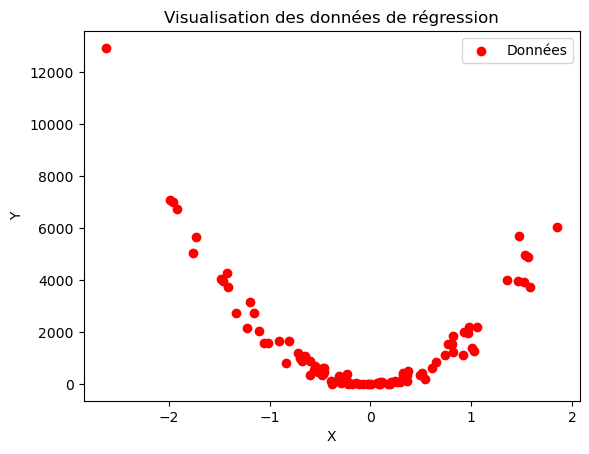

In [11]:
import matplotlib.pyplot as plt  # Importation de la bibliothèque matplotlib pour la visualisation des données

# Tracer un nuage de points pour visualiser les données de régression
# X[:,0] sélectionne la première colonne de X, qui représente les valeurs de la caractéristique unique
# y représente les valeurs cibles
# color='red' définit la couleur des points sur le nuage de points
# label='Données' est le libellé associé à ce nuage de points dans la légende
plt.scatter(X[:,0], y, color='red', label='Données')

plt.xlabel('X')  # Ajout d'une étiquette pour l'axe des abscisses
plt.ylabel('Y')  # Ajout d'une étiquette pour l'axe des ordonnées
plt.title('Visualisation des données de régression')  # Ajout d'un titre au graphique
plt.legend()  # Afficher la légende sur le graphique
plt.show()  # Afficher le graphique


### **Question 4**

4- Définir votre modèle avec SGDRegressor() sur 100 itérations avec un Learning rate de 0.0001.

In [12]:
from sklearn.linear_model import SGDRegressor  # Importation du modèle de régression linéaire avec descente de gradient stochastique (SGDRegressor) de scikit-learn

# Création d'une instance du modèle de régression linéaire avec descente de gradient stochastique (SGDRegressor)
# max_iter est le nombre maximal d'itérations
# learning_rate est le taux d'apprentissage utilisé pendant l'optimisation
# eta0 est le taux d'apprentissage initial
model = SGDRegressor(max_iter=100, learning_rate='constant', eta0=0.0001)


### **Question 5**

5- Entraîner votre modèle en utilisant la méthode fit().

In [13]:
#Cela entraîne le modèle SGDRegressor sur les données d'entraînement (X) et les valeurs cibles (y). En utilisant la méthode fit(), le modèle ajuste ses paramètres internes pour minimiser l'erreur entre les prédictions du modèle et les valeurs cibles réelles. Cela permet d'obtenir un modèle qui peut être utilisé pour faire des prédictions sur de nouvelles données.
model.fit(X, y)


C:\Users\user\anaconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1548: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


SGDRegressor(eta0=0.0001, learning_rate='constant', max_iter=100)

### **Question 6**

6- Calculer la précision de votre modèle en utilisant la fonction score qui calcule le coefficient de détermination entre le modèle et les valeurs y de votre Dataset.

In [14]:
# Calculer la précision du modèle en utilisant la méthode score() du modèle SGDRegressor
# La méthode score() renvoie le coefficient de détermination R² du modèle
precision = model.score(X, y)

# Afficher la précision du modèle
print("Précision du modèle (R²) :", precision)


Précision du modèle (R²) : -0.004276299327540478


### **Question 7**

7- Faire de nouvelles prédictions avec la fonction predict() et tracer les résultats.

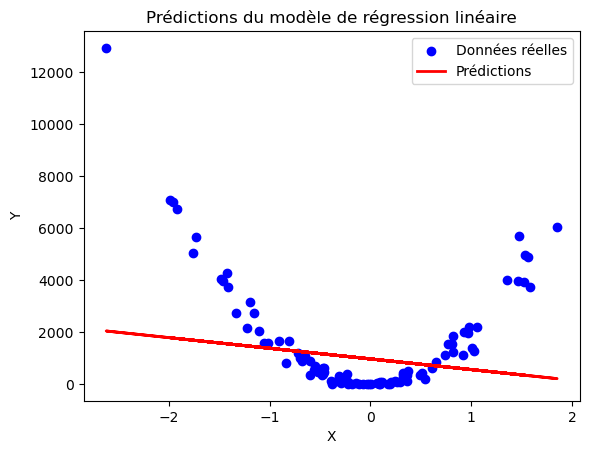

In [15]:
# Faire des prédictions sur les données d'entraînement à l'aide du modèle entraîné
predictions = model.predict(X)

# Tracer un nuage de points pour les données réelles
plt.scatter(X, y, color='blue', label='Données réelles')

# Tracer la ligne de régression pour les prédictions du modèle
plt.plot(X, predictions, color='red', linewidth=2, label='Prédictions')

plt.xlabel('X')  # Ajouter une étiquette pour l'axe des abscisses
plt.ylabel('Y')  # Ajouter une étiquette pour l'axe des ordonnées
plt.title('Prédictions du modèle de régression linéaire')  # Ajouter un titre au graphique
plt.legend()  # Afficher la légende sur le graphique
plt.show()  # Afficher le graphique


### **Question 8**

8- Refaire le même travail en entraînant votre modèle sur 1000 itérations avec un Learning rate de 0.001.

Précision du modèle (R²) : 0.06840705376951473


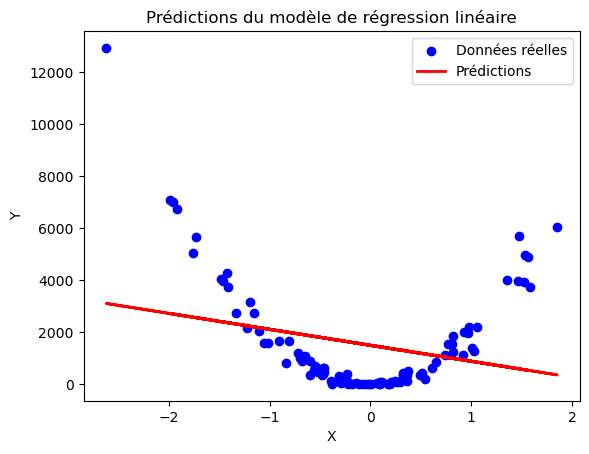

In [16]:
# Création d'une nouvelle instance du modèle SGDRegressor avec des paramètres différents
model = SGDRegressor(max_iter=1000, learning_rate='constant', eta0=0.001, random_state=42)

# Entraînement du nouveau modèle sur les données d'entraînement X et les valeurs cibles y
model.fit(X, y)

# Calcul de la précision du nouveau modèle en utilisant la méthode score()
precision = model.score(X, y)

# Affichage de la précision du nouveau modèle
print("Précision du modèle (R²) :", precision)

# Faire des prédictions avec le nouveau modèle
predictions = model.predict(X)

# Tracer les données réelles et les prédictions du nouveau modèle sur un graphique
plt.scatter(X, y, color='blue', label='Données réelles')
plt.plot(X, predictions, color='red', linewidth=2, label='Prédictions')
plt.xlabel('X')  # Ajout d'une étiquette pour l'axe des abscisses
plt.ylabel('Y')  # Ajout d'une étiquette pour l'axe des ordonnées
plt.title('Prédictions du modèle de régression linéaire')  # Ajout d'un titre au graphique
plt.legend()  # Affichage de la légende
plt.show()  # Affichage du graphique
